# Particle Swarm Optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Functions to optimize

The Rosenbrock function is defined as:
$$ f(\mathbf{x}) = \sum_{i=1}^{d-1} \left[ 100(x_{i+1} - x_i^2)^2 + (1 - x_i)^2 \right] $$
with:
- $x_i$ dimension i of the input vector $\mathbf{x}$.
- $d$ number of dimensions of the input vector $\mathbf{x}$.

The function has a global minimum of 0, which occurs at $x_i = 1$  for all $i$. The Rosenbrock function is non-convex and has a narrow, curved valley. The bottom of this valley is flat, and it is easy to find the valley but challenging to converge to the global minimum.

In [2]:
def rosenbrock(x):
    """
    Rosenbrock (Banana) function.
    Input parameter
    - x: input vector
    Return value
    - f(x)
    """
    f = 0
    for i in range(len(x) - 1):
        f += 100 * (x[i + 1] - x[i] ** 2) ** 2 + (1 - x[i]) ** 2
    return f

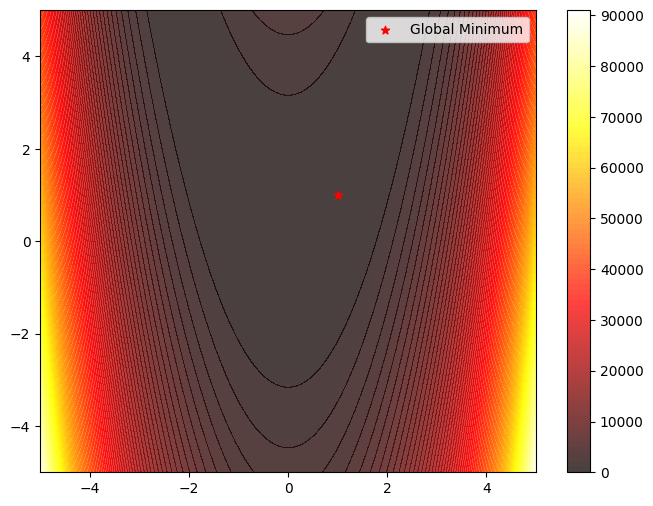

In [3]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock([X, Y])

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, 100, alpha=0.75, cmap=plt.cm.hot)
plt.colorbar()
plt.scatter(1, 1, c="r", marker="*", label="Global Minimum")
plt.legend()
plt.show()

Sphere function defined as:
$$f(\mathbf{x}) = \sum_{i=1}^{d} x_i^2$$
with:
- $x_i$ dimension i of the input vector $\mathbf{x}$.
- $d$ number of dimensions of the input vector $\mathbf{x}$.

The function's global minimum is 0, which occurs when $x_i = 0$ for all $i$. The quadratic function is a convex function, very simple to optimize.

In [4]:
def sphere(x):
    """
    Sphere function.\\
    Input parameter
    - x: input vector
    Return value
    - f(x)
    """
    f = 0
    for i in range(len(x)):
        f += x[i] ** 2
    return f

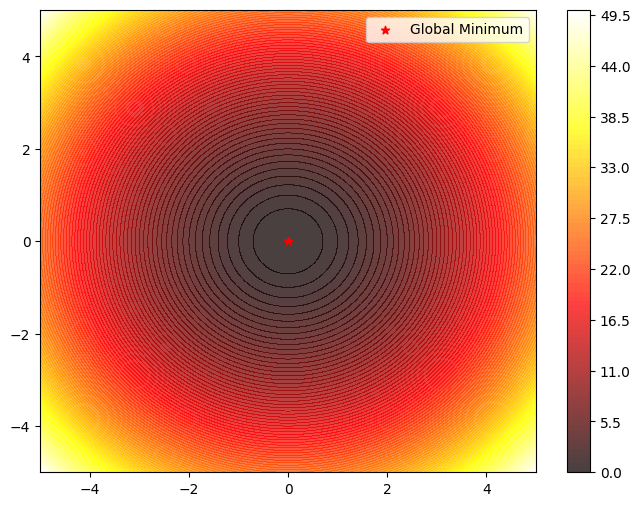

In [5]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = sphere([X, Y])

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, 100, alpha=0.75, cmap=plt.cm.hot)
plt.colorbar()
plt.scatter(0, 0, c="r", marker="*", label="Global Minimum")
plt.legend()
plt.show()

## PSO algorithm

In [6]:
def PSO(
    num_particles,
    dim,
    pos_range,
    f,
    w,
    max_iter=100,
    c=1,
    s=1,
    iter_between_print=None,
):
    """
    Particle Swarm Optimization algorithm.\\
    Input parameters:
    - swarm_position: initial positions of the swarm
    - pos_range: range of the positions of the swarm
    - f: function to minimize
    - w: controls the inertia when updating the velocity
    - max_iter: maximum number of iterations
    - c: controls the weight of the cognitive component (single particle improvement)
    - s: controls the weight of the social component (group improvement)
    - tot_print: number of iterations between each print
    Return values:
    - gbest_position: best position found
    - gbest_score: score of the best position found
    """
    # Initialize
    if iter_between_print is None:
        iter_between_print = max_iter // 10
    lower_bound = pos_range[0]
    upper_bound = pos_range[1]

    assert type(lower_bound) == type(upper_bound) == int
    assert lower_bound < upper_bound

    swarm_position = np.random.uniform(lower_bound, upper_bound, (num_particles, dim))
    num_particles = swarm_position.shape[0]
    swarm_best_position = swarm_position.copy()
    swarm_best_score = np.array([np.inf] * num_particles)
    gbest_score = np.inf

    # v = np.zeros(swarm_position.shape)
    v = np.random.uniform(
        lower_bound - upper_bound,
        upper_bound - lower_bound,
        swarm_position.shape,
    )

    start = time.time()
    for i in range(max_iter):
        for j in range(num_particles):
            score = f(swarm_position[j])
            if score < swarm_best_score[j]:
                swarm_best_position[j] = swarm_position[j]
                swarm_best_score[j] = score
            if score < gbest_score:
                gbest_position = swarm_position[j]
                gbest_score = score
                best_iter = i + 1
                best_end = time.time()
        if i % iter_between_print == 0:
            print(
                f"Iteration: {i}, Best score: {gbest_score:.10f}, Best position: {gbest_position}"
            )
        for j in range(num_particles):
            v[j] = (
                w * v[j]
                + c * np.random.rand() * (swarm_best_position[j] - swarm_position[j])
                + s * np.random.rand() * (gbest_position - swarm_position[j])
            )
            swarm_position[j] += v[j]

    end = time.time()
    print(f"Total time: {(end-start):.3f}")
    print(f"Time until best: {(best_end-start):.3f}")
    print(f"Best found at iteration {best_iter}")
    return gbest_position, gbest_score

## Test

In [7]:
# Rosenbrock function
f = rosenbrock

# algorithm parameters
dim = 10
num_particles = 5000
pos_range = [-5, 5]
max_iter = 1000
# set a seed for reproducibility
np.random.seed(42)
# run the PSO algorithm
gbest_position, gbest_score = PSO(
    num_particles,
    dim,
    pos_range,
    f,
    w=0.75,
    max_iter=max_iter,
    c=1,
    s=1,
)
print(f"Best score: {gbest_score:.10f}, Best position: {gbest_position}")

Iteration: 0, Best score: 2532.1058796310, Best position: [ 0.1273647  -0.24349016  1.45097446  0.57474549  1.43942305  1.12854774
  2.19196561  1.42803509  0.19742486  1.81796811]
Iteration: 100, Best score: 4.4846971085, Best position: [ 0.95001586  0.9090704   0.8240173   0.68571839  0.45228832  0.19281907
  0.01251323 -0.04352523  0.0193472   0.01755625]
Iteration: 200, Best score: 0.0843729009, Best position: [1.00359754 0.99616949 0.9921194  0.98798836 0.98276768 0.97803026
 0.9595805  0.91268635 0.8275     0.6878876 ]
Iteration: 300, Best score: 0.0000000007, Best position: [1.00000055 1.00000037 1.00000001 1.00000056 1.00000028 0.9999996
 1.00000028 1.00000198 1.00000494 1.00000979]
Iteration: 400, Best score: 0.0000000000, Best position: [1.         0.99999998 1.         1.         0.99999998 1.00000001
 1.00000003 1.00000008 1.00000012 1.00000023]
Iteration: 500, Best score: 0.0000000000, Best position: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Iteration: 600, Best score: 0.0000000000,

In [8]:
f = sphere

# algorithm parameters
dim = 6
num_particles = 500
pos_range = [-5, 5]
max_iter = 1000
# set a seed for reproducibility
np.random.seed(42)
# run the PSO algorithm
gbest_position, gbest_score = PSO(
    num_particles,
    dim,
    pos_range,
    f,
    w=0.2,
    max_iter=max_iter,
    c=1,
    s=1,
)
print(f"Best score: {gbest_score:.10f}, Best position: {gbest_position}")

Iteration: 0, Best score: 6.4480918761, Best position: [ 0.53802241 -1.94475689 -1.03018483 -0.52797459  1.00594333  0.15679428]
Iteration: 100, Best score: 0.0000000000, Best position: [ 3.48243359e-06 -1.21062131e-06 -2.53903047e-09 -6.23261627e-07
  5.33749925e-07  4.86974955e-06]
Iteration: 200, Best score: 0.0000000000, Best position: [ 3.48241410e-06 -1.21058910e-06 -2.56932338e-09 -6.23243458e-07
  5.33719078e-07  4.86968252e-06]
Iteration: 300, Best score: 0.0000000000, Best position: [ 3.48241410e-06 -1.21058909e-06 -2.56932392e-09 -6.23243458e-07
  5.33719078e-07  4.86968252e-06]
Iteration: 400, Best score: 0.0000000000, Best position: [ 3.48241410e-06 -1.21058909e-06 -2.56932392e-09 -6.23243458e-07
  5.33719078e-07  4.86968252e-06]
Iteration: 500, Best score: 0.0000000000, Best position: [ 3.48241410e-06 -1.21058909e-06 -2.56932392e-09 -6.23243458e-07
  5.33719078e-07  4.86968252e-06]
Iteration: 600, Best score: 0.0000000000, Best position: [ 3.48241410e-06 -1.21058909e-06 -